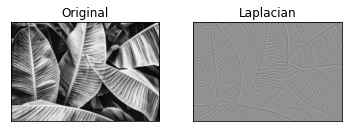

In [3]:
#i. Laplacian edge
import cv2
import numpy as np
from matplotlib import pyplot as plt
img0 = cv2.imread('lab7p.jpg',)

# Gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

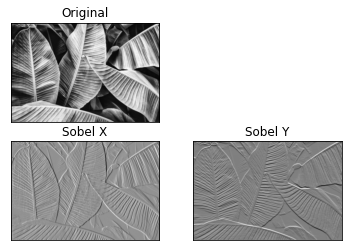

In [4]:
#iii.Sobel horizontal and vertical.
import cv2
import numpy as np
from matplotlib import pyplot as plt
img0 = cv2.imread('lab7p.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Horizontal'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Vertical'), plt.xticks([]), plt.yticks([])


In [ ]:
#ii.Prewitt Filter.
import cv2
import numpy as np

img = cv2.imread("lab7p.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt", img_prewittx + img_prewitty)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#iv.Canny
import cv2
img = cv2.imread("lab7p.jpg")
t_lower = 100 
t_upper = 200 
aperture_size = 5 
# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper,apertureSize=aperture_size)
cv2.imshow('original', img)
cv2.imshow('Canny', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
#v Robert Filter
import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("lab7p.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imshow("Robertfilter",edged_img)
cv2.waitKey(0)

-1

In [1]:
#Hough Transformation
#I. line detection
import cv2
import numpy as np
img = cv2.imread('lab7p.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow('houghlines',img)
cv2.waitKey(0)

-1

In [3]:
#Circle Detection
import numpy as np
import cv2 as cv
img = cv.imread('lab7p.jpg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()